# Sudan World Food Prices Dashboard

This project aims to build an interactive dashboard that displays the prices of staple foods in Sudan from  January 15 2001 to November 15, 2023, using data from the world food database.
The following steps were taken:
1) Sourcing the data - I explored different publically available databases and selected a current issue to highlight. Since 2001 staple food prices in Sudan have been rising at an alarming rate. This project aims to highlight the steep rise in food prices over time and discuss the implications. 
2) Loading and exploring the dataset - I loaded the dataset using pandas and explored the dataset using the df.head() and df.info() commands to investigate the dataset. 
3) Data preprocessing - After identifying areas to clean within the dataset, i removed unnecessary data, changed datatypes and created new columns to combine information as needed to prepare the data for visualisation. 
4) Data visualisation - I selected the most relevant parts of the dataset and visualised them using line and bar plots, and a table. Using panel, I created widgets to make the visualisations interactive to display the information effectively. 


# Load dataset and explore 

In [2]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [3]:
df = pd.read_csv('wfp_food_prices_sdn.csv')
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2001-01-15,Blue Nile,Damazin,Damazin,11.7891,34.3592,cereals and tubers,Sorghum (white),90 KG,actual,Wholesale,SDG,46.0,17.8728
2,2001-01-15,Gedaref,Al Gedaref Rural,El Gedarif,14.04,35.38,cereals and tubers,Sorghum (white),90 KG,actual,Wholesale,SDG,51.67,20.0758
3,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Millet,90 KG,actual,Wholesale,SDG,77.29,30.0302
4,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Sorghum (white),90 KG,actual,Wholesale,SDG,63.9,24.8277


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 1 to 10929
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10810 non-null  datetime64[ns]
 1   state              10810 non-null  object        
 2   settlement         10810 non-null  object        
 3   market             10810 non-null  object        
 4   latitude           10810 non-null  object        
 5   longitude          10810 non-null  object        
 6   category           10810 non-null  object        
 7   commodity          10810 non-null  object        
 8   unit(KG)           10810 non-null  float64       
 9   priceflag          10810 non-null  object        
 10  pricetype          10810 non-null  object        
 11  currency           10810 non-null  object        
 12  price              10810 non-null  float64       
 13  usdprice           10810 non-null  float64       
 14  price per K

In [20]:
df.columns


Index(['date', 'state', 'settlement', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit(KG)', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'price per KG(SDG)',
       'price per KG(USD)', 'year', 'region'],
      dtype='object')

In [21]:
df['commodity'].unique()


array(['Sorghum (white)', 'Millet', 'Wheat', 'Sorghum',
       'Sorghum (food aid)'], dtype=object)

In [22]:
df['state'].unique()

array(['Blue Nile', 'Gedaref', 'Khartoum', 'North Kordofan',
       'North Darfur', 'Northern', 'Eastern Darfur', 'Kassala', 'Red Sea',
       'South Darfur', 'West Darfur', 'White Nile', 'South Kordofan',
       'Central Darfur', 'West Kordofan', 'Al Gezira', 'Nile', 'Sennar'],
      dtype=object)

# Data Preprocessing

In [5]:
# Rename columns and remove non-food related data 

new_column_names = {
    'admin1': 'state',
    'admin2': 'settlement',
}
df.rename(columns=new_column_names, inplace=True)
df = df.drop(0)
df = df[df['category'] != 'non-food']
df['unit'] = df['unit'].str.replace(' KG', '').astype(float)
df.rename(columns={'unit': 'unit(KG)'}, inplace=True)
df.head()

,date,state,settlement,market,latitude,longitude,category,commodity,unit(KG),priceflag,pricetype,currency,price,usdprice
1,2001-01-15,Blue Nile,Damazin,Damazin,11.7891,34.3592,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,46.0,17.8728
2,2001-01-15,Gedaref,Al Gedaref Rural,El Gedarif,14.04,35.38,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,51.67,20.0758
3,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Millet,90.0,actual,Wholesale,SDG,77.29,30.0302
4,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,63.9,24.8277
5,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Wheat,90.0,actual,Wholesale,SDG,81.5,31.666


In [6]:
#Convert object types
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)
df['usdprice'] = df['usdprice'].astype(float)

# Create new price per KG column 
df['price per KG(SDG)'] = df['price']/ df['unit(KG)']
df['price per KG(USD)'] = df['usdprice']/ df['unit(KG)']

# Create new year column 
df['year'] = df['date'].dt.year

df['year'] = df['year'].astype(int)
df.head()
# Create new region column - this is to reduce the variables and group the different states into central, north, south, and east regions
region_mapping = {
    'Khartoum': 'Central', 'North Kordofan': 'Central', 'Al Gezira': 'Central',
    'Northern': 'North', 'Nile': 'North',
    'South Kordofan': 'South', 'Blue Nile': 'South', 'White Nile': 'South',
    'Eastern Darfur': 'South', 'West Kordofan': 'South',
    'Kassala': 'East', 'Red Sea': 'East', 'Gedaref': 'East', 'Sennar': 'East',
    'North Darfur': 'West', 'South Darfur': 'West',
    'West Darfur': 'West', 'Central Darfur': 'West'
}


df['region'] = df['state'].map(region_mapping)
df.head()

,date,state,settlement,market,latitude,longitude,category,commodity,unit(KG),priceflag,pricetype,currency,price,usdprice,price per KG(SDG),price per KG(USD),year,region
1,2001-01-15,Blue Nile,Damazin,Damazin,11.7891,34.3592,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,46.00,17.8728,0.511111,0.198587,2001,South
2,2001-01-15,Gedaref,Al Gedaref Rural,El Gedarif,14.04,35.38,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,51.67,20.0758,0.574111,0.223064,2001,East
3,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Millet,90.0,actual,Wholesale,SDG,77.29,30.0302,0.858778,0.333669,2001,Central
4,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Sorghum (white),90.0,actual,Wholesale,SDG,63.90,24.8277,0.710000,0.275863,2001,Central
5,2001-01-15,Khartoum,Jebal Aulya,Khartoum,15.5126,32.5436,cereals and tubers,Wheat,90.0,actual,Wholesale,SDG,81.50,31.6660,0.905556,0.351844,2001,Central


In [15]:
df['commodity'].unique()

array(['Sorghum (white)', 'Millet', 'Wheat', 'Sorghum',
       'Sorghum (food aid)'], dtype=object)

In [16]:
df['state'].unique()

array(['Blue Nile', 'Gedaref', 'Khartoum', 'North Kordofan',
       'North Darfur', 'Northern', 'Eastern Darfur', 'Kassala', 'Red Sea',
       'South Darfur', 'West Darfur', 'White Nile', 'South Kordofan',
       'Central Darfur', 'West Kordofan', 'Al Gezira', 'Nile', 'Sennar'],
      dtype=object)

In [23]:
# Make FataFrame Pipeline Interactive 
idf = df.interactive()

# (1) Food prices over time by region 

In [24]:
# Define Panel widgets 

import panel as pn

# Extract years from the 'Date' column
years = sorted(df['date'].dt.year.unique())
year_slider = pn.widgets.IntSlider(name='Year slider', start=2001, end=2023, value=2005)
year_slider.servable()
# # Display the slider
year_slider

IntSlider(end=2023, name='Year slider', start=2001, value=2005)

In [25]:
# Radio Buttons for Currency 
yaxis_price = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['price per KG(SDG)','price per KG(USD)',],
    button_type='success'
)

In [26]:
regions = ['South', 'East', 'Central', 'West', 'North']

price_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.region.isin(regions))
    ]
    .groupby(['region', 'year'])[yaxis_price].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)


In [27]:
price_plot = price_pipeline.hvplot(x='year', by='region', y=yaxis_price, line_width=2, title='Price of food by region')

# Display the plot
price_plot

# (2) Table - Food prices over time by region

In [28]:
price_table = price_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
price_table

# (3) Bar chart with food prices by State  

In [29]:
df['state'].unique()

array(['Blue Nile', 'Gedaref', 'Khartoum', 'North Kordofan',
       'North Darfur', 'Northern', 'Eastern Darfur', 'Kassala', 'Red Sea',
       'South Darfur', 'West Darfur', 'White Nile', 'South Kordofan',
       'Central Darfur', 'West Kordofan', 'Al Gezira', 'Nile', 'Sennar'],
      dtype=object)

In [30]:

states= ['Blue Nile', 'Gedaref', 'Khartoum', 'North Kordofan','North Darfur', 'Northern', 'Eastern Darfur', 'Kassala', 'Red Sea','South Darfur', 'West Darfur', 'White Nile', 'South Kordofan','Central Darfur', 'West Kordofan', 'Al Gezira', 'Nile', 'Sennar']

state_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.state.isin(states))
    ]
    .groupby(['year', 'state'])[yaxis_price].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [31]:
state_bar_plot = state_bar_pipeline.hvplot(kind='bar', 
                                                     x='state', 
                                                     y=yaxis_price, 
                                                     title='Food prices by state',
                                          rot=45)

state_bar_plot

# (4) Bar Chart with Food prices by commodity 

In [32]:
commodities =['Sorghum (white)', 'Millet', 'Wheat', 'Sorghum','Sorghum (food aid)']

commodity_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.commodity.isin(commodities))
    ]
    .groupby(['year','commodity'])[yaxis_price].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [33]:
commodity_bar_plot = commodity_bar_pipeline.hvplot(kind='bar', 
                                                     x='commodity', 
                                                     y=yaxis_price, 
                                                     title='Food prices by commodity',
                                          rot=45)
commodity_bar_plot


Launching server at http://localhost:49764


FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo(dark_mode=False, device_pixel_ratio=1.5, language='en-GB', timezone='Europe/London', timezone_offset=0, webdriver=False)
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2487548098192] Row(height=400)
        [0] Interactive(Interactive)
        [1] Interactive(Interactive)
    [2487548340112] GridBox(ncols=2, sizing_mode='scale_width')
        [0] Interactive(Interactive)
        [1] Interactive(Interactive)
    [2487547831760] Markdown(str)
    [2487546584784] Markdown(str)
    [2487547961424] Markdown(str)
    [2487548057680] PNG(str, sizing_mode='scale_both')
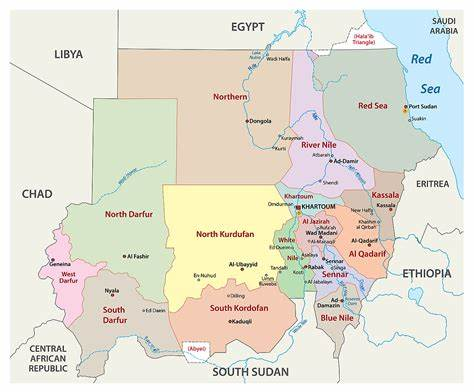

In [34]:
# Final Dashboard 


data_source_info = pn.pane.Markdown("Data source: Food Prices 2024 © World Food Programme")
template = pn.template.FastListTemplate(
    title='Sudan Food Prices', 
    sidebar=[pn.pane.Markdown("# Food Inflation Over time"), 
             pn.pane.Markdown("#### Between 2001 and 2023, Sudan experienced significant fluctuations in food inflation, driven by a combination of internal and external factors. The country's economy faced challenges such as political instability, conflicts, economic sanctions, and natural disasters, all of which impacted food production, distribution, and pricing. During this period, Sudan witnessed periods of high food inflation, particularly in the early 2000s and again in the 2010s. The secession of South Sudan in 2011 further strained the economy, as Sudan lost a significant portion of its oil revenues, exacerbating inflationary pressures."), 
             pn.pane.PNG('sudan-map.png', sizing_mode='scale_both')],
    main=[
        pn.Row(price_plot, state_bar_plot, height=400),
        pn.GridBox(
            price_table,
            commodity_bar_plot,
            ncols=2,
            align='start',
            sizing_mode='scale_width'
        ),
        data_source_info  
    ]
)

template.show()
template.servable()

